<a href="https://colab.research.google.com/github/Kowsalyasriganesh/linear-regression/blob/main/linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [4]:
df = pd.read_csv("50_Startups.csv")

In [5]:
df.head()

,R&D Spend,Administration,Marketing Spend,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94


In [6]:
df.tail()

,R&D Spend,Administration,Marketing Spend,Profit
45,1000.23,124153.04,1903.93,64926.08
46,1315.46,115816.21,297114.46,49490.75
47,0.00,135426.92,0.00,42559.73
48,542.05,51743.15,0.00,35673.41
49,0.00,116983.80,45173.06,14681.40


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   Profit           50 non-null     float64
dtypes: float64(4)
memory usage: 1.7 KB


In [8]:
df.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [9]:
df.nunique()

R&D Spend          49
Administration     50
Marketing Spend    48
Profit             50
dtype: int64

In [10]:
df.shape

(50, 4)

In [11]:
df.isna().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
Profit             0
dtype: int64

<Axes: >

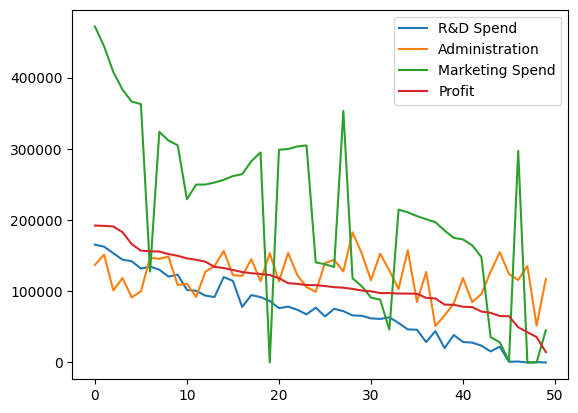

In [12]:
df.plot()

In [13]:
df['Profit'].value_counts()

192261.83    1
89949.14     1
105008.31    1
103282.38    1
101004.64    1
99937.59     1
97483.56     1
97427.84     1
96778.92     1
96712.80     1
96479.51     1
90708.19     1
81229.06     1
191792.06    1
81005.76     1
78239.91     1
77798.83     1
71498.49     1
69758.98     1
65200.33     1
64926.08     1
49490.75     1
42559.73     1
35673.41     1
105733.54    1
107404.34    1
108552.04    1
108733.99    1
191050.39    1
182901.99    1
166187.94    1
156991.12    1
156122.51    1
155752.60    1
152211.77    1
149759.96    1
146121.95    1
144259.40    1
141585.52    1
134307.35    1
132602.65    1
129917.04    1
126992.93    1
125370.37    1
124266.90    1
122776.86    1
118474.03    1
111313.02    1
110352.25    1
14681.40     1
Name: Profit, dtype: int64

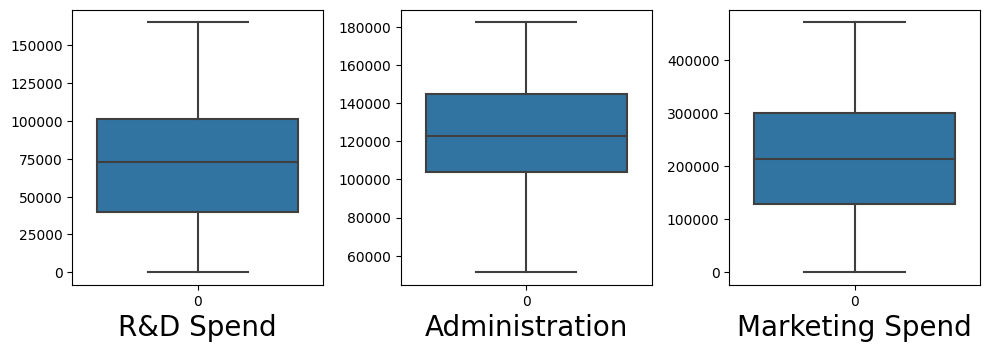

In [14]:
x = df.drop('Profit', axis= 1)
y = df['Profit']
plt.figure(figsize = (10,10))
plotnumber = 1
for col in x.columns:
    if plotnumber <= 3:
        ax = plt.subplot (3, 3, plotnumber)
        sns.boxplot(x[col])
        plt.xlabel(col, fontsize = 20)
    plotnumber += 1
plt.tight_layout()
plt.show()

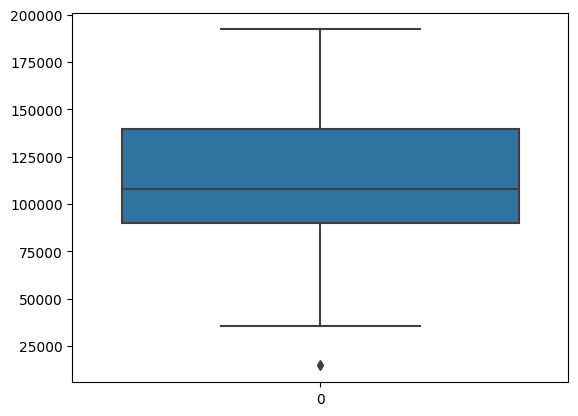

In [15]:
sns.boxplot(y)
plt.show()

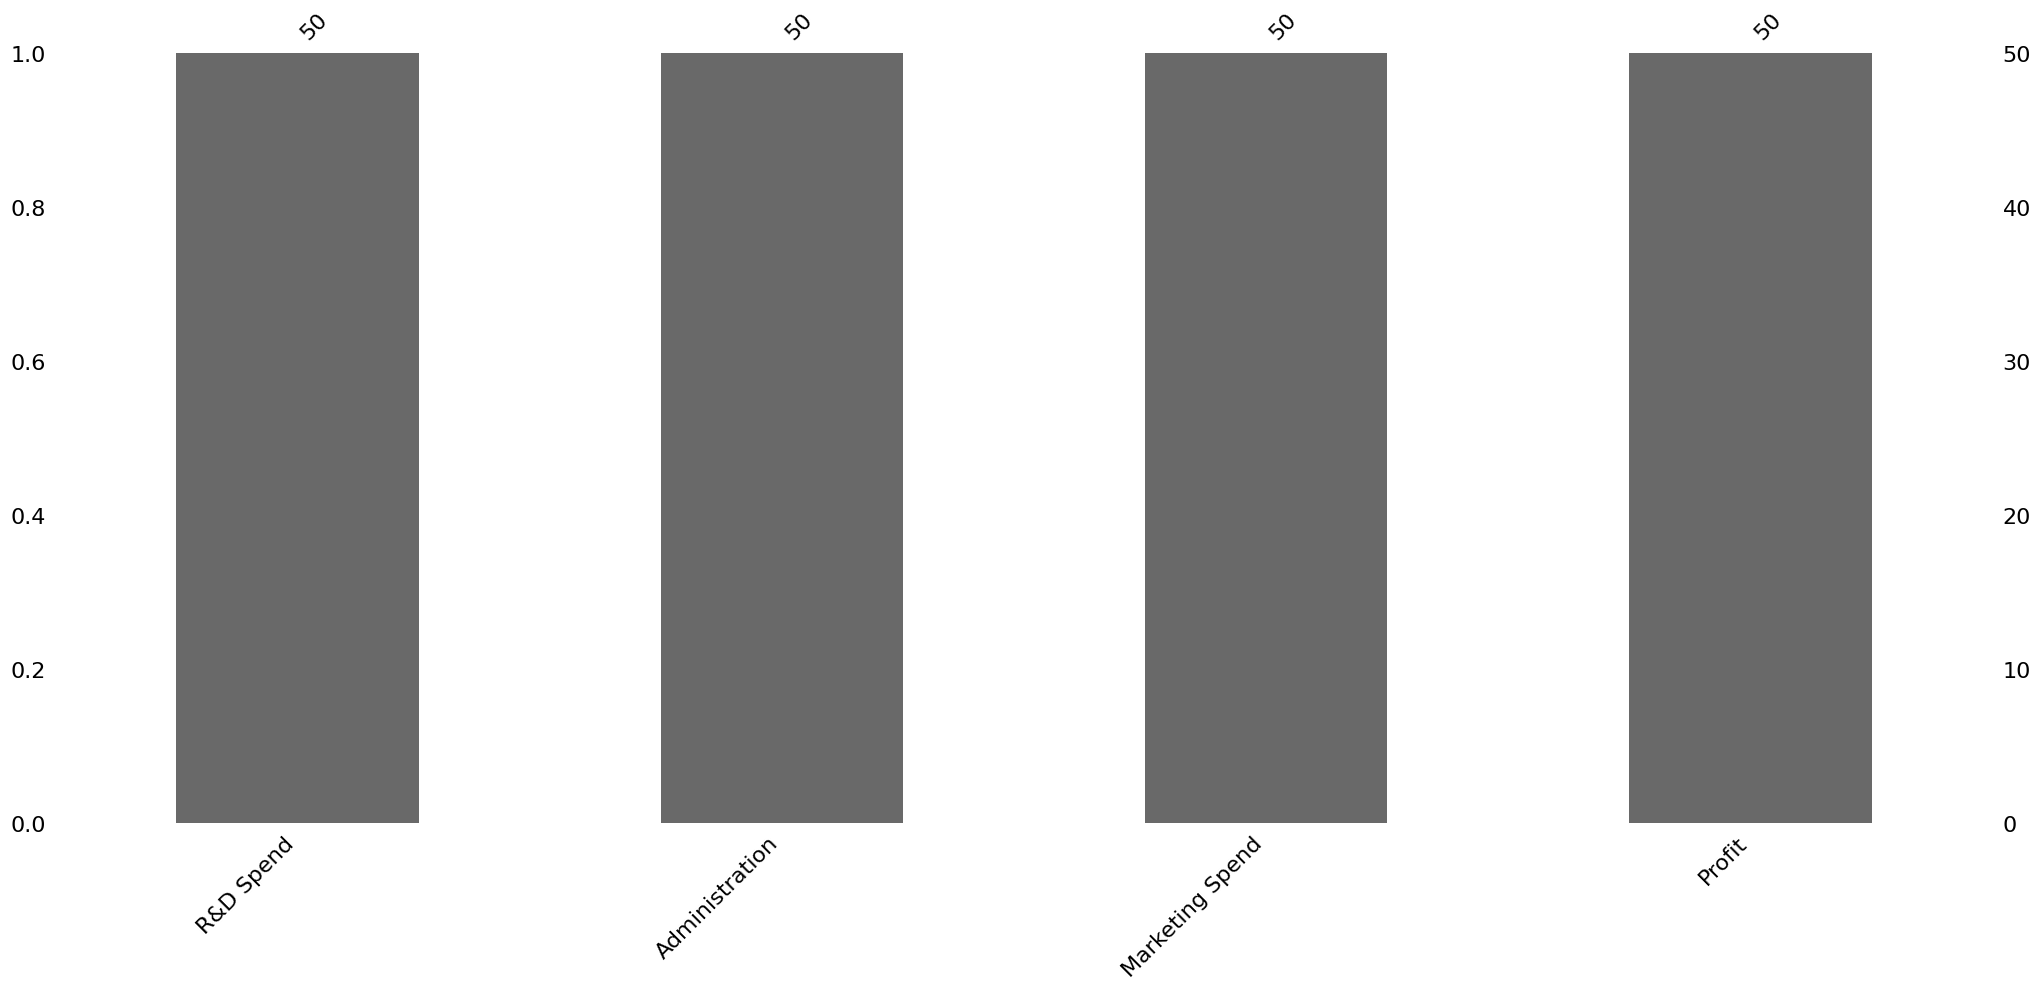

In [16]:
import missingno as mn
mn.bar(df)
plt.show()

In [17]:
c = df.corr()
c

,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


In [18]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state=0)

In [19]:
a = StandardScaler()
x_train = a.fit_transform(x_train)
x_test = a.transform(x_test)

In [20]:
from sklearn.linear_model import LinearRegression

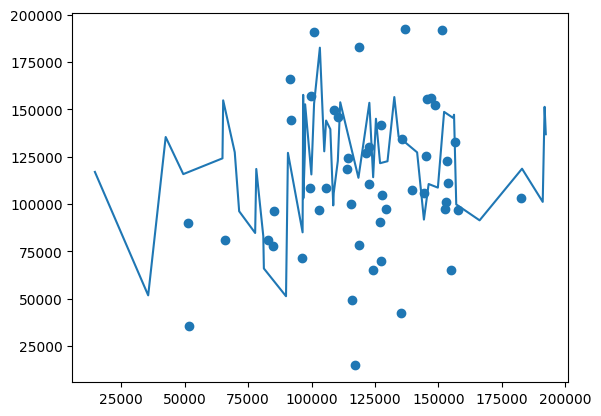

In [21]:
y = df.Profit
m = df.Administration
plt.scatter(m,y)
plt.plot(y,m)
plt.show()

In [22]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import explained_variance_score
from sklearn.metrics import mean_squared_log_error
from sklearn.metrics import median_absolute_error

In [23]:
n = 50 #number of rows
p = 3 #number of predictor variables

**LINEAR REGRESSION**

In [24]:
clf = LinearRegression()
clf.fit(x_train, y_train)

LinearRegression()

In [25]:
y_pred = clf.predict(x_test)
y_pred

array([104054.44293869, 132719.3459701 , 133640.26830949,  72294.76911458,
       179685.62227843, 114508.97572031,  66305.23069863,  98297.69326565,
       114277.91894933, 169112.36095691,  96257.40152149,  87916.97242208,
       110687.33942598,  90670.8337806 , 127780.63539583])

In [26]:
print("Regression metrics:")
mse = mean_squared_error(y_test, y_pred)
print(f"MSE: {mse}")
mae = mean_absolute_error(y_test, y_pred)
print(f"MAE: {mae}")
r2 = r2_score(y_test, y_pred)
print(f"R2 Score: {r2}")
evs = explained_variance_score(y_test, y_pred)
print(f"Explained variance score: {evs}")
msl = mean_squared_log_error(y_test, y_pred)
print(f"mean squared log error: {msl}")
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"RMSE: {rmse}")
mpe = np.mean((y_test - y_pred) / y_test) * 100
print(f"Mean Percentage Error: {mpe}")
adj_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)
print(f"Adjusted R2: {mpe}")
medae = median_absolute_error(y_test, y_pred)
print(f"Median Absolute Error: {medae}")

Regression metrics:
MSE: 62240269.84291521
MAE: 6489.660170486644
R2 Score: 0.9355188337118218
Explained variance score: 0.9446515493600536
mean squared log error: 0.006008862722736082
RMSE: 7889.250271281499
Mean Percentage Error: 2.675895416760425
Adjusted R2: 2.675895416760425
Median Absolute Error: 5504.0608854163875


**SUPPORT VECTOR REGRESSION(SVR)**

In [27]:
from sklearn.svm import SVR

In [28]:
a = StandardScaler()
x_train = a.fit_transform(x_train)
x_test = a.transform(x_test)

In [29]:
svc_default = SVR()
svc_linear = SVR(kernel='linear', C=0.1)
svc_poly = SVR(kernel='poly', degree=2)
svc_rbf = SVR(kernel='rbf', gamma=0.5)

In [30]:
svc_default.fit(x_train, y_train)

SVR()

In [31]:
y_pred = svc_default.predict(x_test)
y_pred

array([108731.9331827 , 108733.88556464, 108735.89118742, 108726.60850998,
       108737.05373617, 108737.38960396, 108728.07341698, 108729.45672055,
       108736.54647244, 108736.28576072, 108729.48349315, 108728.09505879,
       108731.69578394, 108731.99328289, 108737.42790491])

In [32]:
print("Regression metrics:")
mse = mean_squared_error(y_test, y_pred)
print(f"MSE: {mse}")
mae = mean_absolute_error(y_test, y_pred)
print(f"MAE: {mae}")
r2 = r2_score(y_test, y_pred)
print(f"R2 Score: {r2}")
evs = explained_variance_score(y_test, y_pred)
print(f"Explained variance score: {evs}")
msl = mean_squared_log_error(y_test, y_pred)
print(f"mean squared log error: {msl}")
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"RMSE: {rmse}")
mpe = np.mean((y_test - y_pred) / y_test) * 100
print(f"Mean Percentage Error: {mpe}")
adj_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)
print(f"Adjusted R2: {mpe}")
medae = median_absolute_error(y_test, y_pred)
print(f"Median Absolute Error: {medae}")

Regression metrics:
MSE: 1020588220.1141709
MAE: 23192.637228442647
R2 Score: -0.0573334418219702
Explained variance score: 0.0001714026614502151
mean squared log error: 0.06253635185999161
RMSE: 31946.64646115725
Mean Percentage Error: 0.5032970375376814
Adjusted R2: 0.5032970375376814
Median Absolute Error: 12248.58505878842


In [33]:
from sklearn.preprocessing import PolynomialFeatures

In [34]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state=0)

In [35]:
degree = 4
polynomial_features = PolynomialFeatures(degree=degree)

In [36]:
x_train = polynomial_features.fit_transform(x_train)

In [37]:
clf = LinearRegression()

In [38]:
clf.fit(x_train, y_train)

LinearRegression()

**POLYNOMIAL REGRESSION**

In [39]:
x_test = polynomial_features.transform(x_test)
y_pred = clf.predict(x_test)

In [40]:
print("Regression metrics:")
mse = mean_squared_error(y_test, y_pred)
print(f"MSE: {mse}")
mae = mean_absolute_error(y_test, y_pred)
print(f"MAE: {mae}")
r2 = r2_score(y_test, y_pred)
print(f"R2 Score: {r2}")
evs = explained_variance_score(y_test, y_pred)
print(f"Explained variance score: {evs}")
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"RMSE: {rmse}")
mpe = np.mean((y_test - y_pred) / y_test) * 100
print(f"Mean Percentage Error: {mpe}")
adj_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)
print(f"Adjusted R2: {mpe}")
medae = median_absolute_error(y_test, y_pred)
print(f"Median Absolute Error: {medae}")

Regression metrics:
MSE: 18376595268.04398
MAE: 89315.00146488225
R2 Score: -18.038225545613937
Explained variance score: -17.651746731103543
RMSE: 135560.30122437756
Mean Percentage Error: -1.3850365370376183
Adjusted R2: -1.3850365370376183
Median Absolute Error: 20205.442204846782


**RIDGE REGRESSION**

In [41]:
from sklearn.linear_model import Ridge

In [42]:
a = StandardScaler()
x_train = a.fit_transform(x_train)
x_test = a.transform(x_test)

In [43]:
ri = Ridge()

In [44]:
ri.fit(x_train, y_train)

Ridge()

In [45]:
y_pred = ri.predict(x_test)
y_pred

array([ 98190.60561809, 129189.25976338, 131640.66742435,  73912.64030919,
       181549.86964824, 117089.33962891,  68329.4782695 ,  99248.02060566,
       116891.65228401, 167367.56344731,  97844.26499841,  88846.92101188,
       111168.67128383,  84794.6461939 , 129878.06073425])

In [46]:
print("Regression metrics:")
mse = mean_squared_error(y_test, y_pred)
print(f"MSE: {mse}")
mae = mean_absolute_error(y_test, y_pred)
print(f"MAE: {mae}")
r2 = r2_score(y_test, y_pred)
print(f"R2 Score: {r2}")
evs = explained_variance_score(y_test, y_pred)
print(f"Explained variance score: {evs}")
msl = mean_squared_log_error(y_test, y_pred)
print(f"mean squared log error: {msl}")
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"RMSE: {rmse}")
mpe = np.mean((y_test - y_pred) / y_test) * 100
print(f"Mean Percentage Error: {mpe}")
adj_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)
print(f"Adjusted R2: {mpe}")
medae = median_absolute_error(y_test, y_pred)
print(f"Median Absolute Error: {medae}")

Regression metrics:
MSE: 79345589.17977628
MAE: 7610.425649589495
R2 Score: 0.9177976550704653
Explained variance score: 0.9278842899985
mean squared log error: 0.0069979000841473024
RMSE: 8907.614112644096
Mean Percentage Error: 2.7108345156052835
Adjusted R2: 2.7108345156052835
Median Absolute Error: 6539.402284007418


**LASSO REGRESSION**

In [47]:
from sklearn.linear_model import Lasso

In [48]:
a = StandardScaler()
x_train = a.fit_transform(x_train)
x_test = a.transform(x_test)

In [49]:
la = Lasso()

In [50]:
la.fit(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.635e+08, tolerance: 6.475e+06
  model = cd_fast.enet_coordinate_descent(


Lasso()

In [51]:
y_pred = la.predict(x_test)
y_pred

array([ 69457.01810785, 125172.1166459 , 131027.04191667,  75036.29951229,
       191150.84287704, 114680.6940975 ,  69983.55823857,  98136.95017888,
       120728.26737963, 171752.51046758, 103393.79594953,  92402.87681856,
       109271.29848557,  88963.18565218, 128888.40164741])

In [52]:
print("Regression metrics:")
mse = mean_squared_error(y_test, y_pred)
print(f"MSE: {mse}")
mae = mean_absolute_error(y_test, y_pred)
print(f"MAE: {mae}")
r2 = r2_score(y_test, y_pred)
print(f"R2 Score: {r2}")
evs = explained_variance_score(y_test, y_pred)
print(f"Explained variance score: {evs}")
msl = mean_squared_log_error(y_test, y_pred)
print(f"mean squared log error: {msl}")
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"RMSE: {rmse}")
mpe = np.mean((y_test - y_pred) / y_test) * 100
print(f"Mean Percentage Error: {mpe}")
adj_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)
print(f"Adjusted R2: {mpe}")
medae = median_absolute_error(y_test, y_pred)
print(f"Median Absolute Error: {medae}")

Regression metrics:
MSE: 150490192.62737158
MAE: 8998.852279408153
R2 Score: 0.8440915638695596
Explained variance score: 0.8568799183717613
mean squared log error: 0.016370152766912036
RMSE: 12267.44442120573
Mean Percentage Error: 3.290702269185223
Adjusted R2: 3.290702269185223
Median Absolute Error: 6614.875949526337


**DECISION TREE REGRESSION**

In [53]:
from sklearn.tree import DecisionTreeRegressor

In [54]:
a = StandardScaler()
x_train = a.fit_transform(x_train)
x_test = a.transform(x_test)

In [55]:
dt = DecisionTreeRegressor()

In [56]:
dt.fit(x_train, y_train)

DecisionTreeRegressor()

In [57]:
y_pred = dt.predict(x_test)
y_pred

array([122776.86, 141585.52, 141585.52,  78239.91, 182901.99, 107404.34,
        71498.49,  99937.59, 118474.03, 156991.12, 108733.99,  89949.14,
       126992.93,  90708.19, 118474.03])

In [58]:
print("Regression metrics:")
mse = mean_squared_error(y_test, y_pred)
print(f"MSE: {mse}")
mae = mean_absolute_error(y_test, y_pred)
print(f"MAE: {mae}")
r2 = r2_score(y_test, y_pred)
print(f"R2 Score: {r2}")
evs = explained_variance_score(y_test, y_pred)
print(f"Explained variance score: {evs}")
msl = mean_squared_log_error(y_test, y_pred)
print(f"mean squared log error: {msl}")
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"RMSE: {rmse}")
mpe = np.mean((y_test - y_pred) / y_test) * 100
print(f"Mean Percentage Error: {mpe}")
adj_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)
print(f"Adjusted R2: {mpe}")
medae = median_absolute_error(y_test, y_pred)
print(f"Median Absolute Error: {medae}")

Regression metrics:
MSE: 95899357.22043338
MAE: 7915.72066666667
R2 Score: 0.9006478857584185
Explained variance score: 0.9014880326324503
mean squared log error: 0.007819552713977766
RMSE: 9792.821719016098
Mean Percentage Error: -1.312342494060002
Adjusted R2: -1.312342494060002
Median Absolute Error: 6530.369999999995


**RANDOM FOREST REGRESSION**

In [59]:
from sklearn.ensemble import RandomForestRegressor

In [60]:
a = StandardScaler()
x_train = a.fit_transform(x_train)
x_test = a.transform(x_test)

In [61]:
rf = RandomForestRegressor()

In [62]:
rf.fit(x_train, y_train)

RandomForestRegressor()

In [63]:
y_pred = rf.predict(x_test)
y_pred

array([112175.34  , 129545.9345, 133065.6944,  78481.0658, 174348.7158,
       117090.6064,  69640.7489,  99853.5717, 117948.1111, 163340.1143,
       100883.7032,  90638.8712, 115107.8921,  98991.8952, 125145.3454])

In [64]:
print("Regression metrics:")
mse = mean_squared_error(y_test, y_pred)
print(f"MSE: {mse}")
mae = mean_absolute_error(y_test, y_pred)
print(f"MAE: {mae}")
r2 = r2_score(y_test, y_pred)
print(f"R2 Score: {r2}")
evs = explained_variance_score(y_test, y_pred)
print(f"Explained variance score: {evs}")
msl = mean_squared_log_error(y_test, y_pred)
print(f"mean squared log error: {msl}")
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"RMSE: {rmse}")
mpe = np.mean((y_test - y_pred) / y_test) * 100
print(f"Mean Percentage Error: {mpe}")
adj_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)
print(f"Adjusted R2: {mpe}")
medae = median_absolute_error(y_test, y_pred)
print(f"Median Absolute Error: {medae}")

Regression metrics:
MSE: 82796647.99166033
MAE: 7533.880786666661
R2 Score: 0.9142223444607748
Explained variance score: 0.9154741062923386
mean squared log error: 0.005992847820964763
RMSE: 9099.26634359388
Mean Percentage Error: 0.22876346569790912
Adjusted R2: 0.22876346569790912
Median Absolute Error: 7595.861099999922


**GRADIENT BOOSTING REGRESSION**

In [65]:
from sklearn.ensemble import GradientBoostingRegressor

In [66]:
a = StandardScaler()
x_train = a.fit_transform(x_train)
x_test = a.transform(x_test)

In [67]:
gb = GradientBoostingRegressor()

In [68]:
gb.fit(x_train, y_train)

GradientBoostingRegressor()

In [69]:
y_pred = gb.predict(x_test)
y_pred

array([118655.88948432, 136354.45875454, 138423.2527805 ,  75977.19499666,
       181902.92765987, 112074.49743571,  65470.09732682,  98043.68896543,
       117679.10632821, 170404.83152794, 101614.25798768,  95573.90615395,
       125099.37403793, 100239.39011999, 129012.03956996])

In [70]:
print("Regression metrics:")
mse = mean_squared_error(y_test, y_pred)
print(f"MSE: {mse}")
mae = mean_absolute_error(y_test, y_pred)
print(f"MAE: {mae}")
r2 = r2_score(y_test, y_pred)
print(f"R2 Score: {r2}")
evs = explained_variance_score(y_test, y_pred)
print(f"Explained variance score: {evs}")
msl = mean_squared_log_error(y_test, y_pred)
print(f"mean squared log error: {msl}")
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"RMSE: {rmse}")
mpe = np.mean((y_test - y_pred) / y_test) * 100
print(f"Mean Percentage Error: {mpe}")
adj_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)
print(f"Adjusted R2: {mpe}")
medae = median_absolute_error(y_test, y_pred)
print(f"Median Absolute Error: {medae}")

Regression metrics:
MSE: 83289415.26972276
MAE: 7350.251852321006
R2 Score: 0.9137118356072895
Explained variance score: 0.9163154244203949
mean squared log error: 0.007821187346035456
RMSE: 9126.303483323505
Mean Percentage Error: -1.5950306630050255
Adjusted R2: -1.5950306630050255
Median Absolute Error: 7066.187435706452


**NEURAL NETWORK REGRESSION**

In [71]:
from sklearn.neural_network import MLPRegressor

In [72]:
a = StandardScaler()
x_train = a.fit_transform(x_train)
x_test = a.transform(x_test)

In [73]:
nn = MLPRegressor()

In [74]:
nn.fit(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPRegressor()

In [75]:
y_pred = nn.predict(x_test)
y_pred

array([ 25.21206885,  25.37574355,  14.05494448,  81.48980307,
       139.37369659,  32.92298055,  87.7424956 ,  37.59041541,
         6.99676005,  75.95329133,  53.63815598,  69.6563342 ,
        27.09656738,  14.01063645,   8.51722625])

In [76]:
print("Regression metrics:")
mse = mean_squared_error(y_test, y_pred)
print(f"MSE: {mse}")
mae = mean_absolute_error(y_test, y_pred)
print(f"MAE: {mae}")
r2 = r2_score(y_test, y_pred)
print(f"R2 Score: {r2}")
evs = explained_variance_score(y_test, y_pred)
print(f"Explained variance score: {evs}")
msl = mean_squared_log_error(y_test, y_pred)
print(f"mean squared log error: {msl}")
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"RMSE: {rmse}")
mpe = np.mean((y_test - y_pred) / y_test) * 100
print(f"Mean Percentage Error: {mpe}")
adj_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)
print(f"Adjusted R2: {mpe}")
medae = median_absolute_error(y_test, y_pred)
print(f"Median Absolute Error: {medae}")

Regression metrics:
MSE: 14452269178.492035
MAE: 116136.40725868379
R2 Score: -13.972608160148198
Explained variance score: 0.0006663414583366611
mean squared log error: 66.05129354397413
RMSE: 120217.59096942525
Mean Percentage Error: 99.95774129425878
Adjusted R2: 99.95774129425878
Median Absolute Error: 104975.38701944577
